## Sentiment Analysis of Amazon Reviews using Machine Learning

#### Data Preparation and Analysis

In [1]:
# Importing required libraries and packages:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import bz2
import os
import gc


from nltk.classify import SklearnClassifier
 

In [2]:
# Unzipping the compressed files in the dataset. It consists of 2 files, one is for training data and the other is for testing:
train_data = bz2.BZ2File('train.ft.txt.bz2')
test_data = bz2.BZ2File('test.ft.txt.bz2')

In [3]:
# Reading the dataset:
train_data_reviews = train_data.readlines()
test_data_reviews = test_data.readlines()

In [4]:
#Reducing the number of lines for dataset
train_lines_reduced = train_data_reviews[:99000]
test_lines_reduced = test_data_reviews[:11000]

In [5]:
# Converting from binary strings to strings that can be parsed and then determining the number of reviews in each file:
train_lines_reduced = [x.decode('utf-8') for x in train_lines_reduced]
test_lines_reduced = [x.decode('utf-8') for x in test_lines_reduced]
print ('Number of Train data reviews:', len(train_lines_reduced))
print ('Number of Test data reviews:', len(test_lines_reduced))

Number of Train data reviews: 99000
Number of Test data reviews: 11000


Labels are the ratings people have given for the product, for instance, Lable 1 is 1-2 stars and label 2 is 4-5 stars. We can seperate the labels from the text so each can be analysed seperately. 

In [6]:
# From the labels we can determine the negative and positive reviews in datasets. Over here, labels are extracted and -1 is assigned for negative reviews and 1 for positive reviews
train_labels = [-1 if x.split(' ')[0]=='__label__1' else 1 for x in train_lines_reduced]
test_labels = [-1 if x.split(' ')[0]=='__label__1' else 1 for x in test_lines_reduced]

**Visualization of labels**<br>
We can visualize the freqeuncy of each label with the help of bar charts. Blue bar represents label 1 which has negative reviews, and orange represents label 2, positive reviews.

Text(0.5, 1.0, 'Train labels distribution')

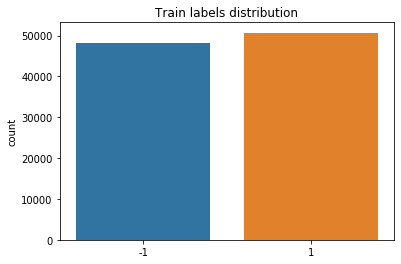

In [7]:
#Graphs for data in train dataset
sns.countplot(train_labels)
plt.title('Train labels distribution')

Text(0.5, 1.0, 'Test label distribution')

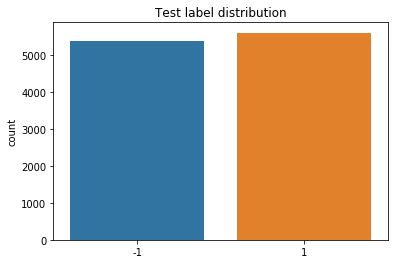

In [8]:
#Graph for data in test dataset
sns.countplot(test_labels)
plt.title('Test label distribution')

In [9]:
# Now we can extract the text part, which is index 1 of the review.
train_text = [x.split(' ', 1)[1][:-1]for x in train_lines_reduced]
test_text = [x.split(' ', 1)[1][:-1] for x in test_lines_reduced]

In [10]:
print (train_text[0])
print (train_text[1])

Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.


In [11]:
# To further understand the distribution of reviews, we can calculate the number of words in each review. 
#The table displays the lenght of the text along with its label and using this we can construct a box plot to visualise mean number of words for negative and positive reviews.
train_text_length = list(map(lambda x: len(x.split()), train_text))
train_label_length = pd.DataFrame({'labels': train_labels, 'len': train_text_length})
neg_reviews = train_label_length.groupby('labels')['len'].mean().values[0]
pos_reviews = train_label_length.groupby('labels')['len'].mean().values[1]

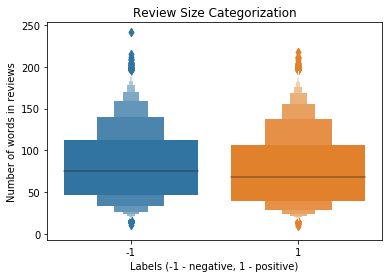

In [12]:
#graphs showing number of positive and negative reviews
sns.boxenplot(x='labels', y='len', data=train_label_length)
plt.xlabel("Labels (-1 - negative, 1 - positive)")
plt.ylabel("Number of words in reviews")
plt.title("Review Size Categorization")
plt.show()

### 1.Data Cleaning

- Removing hyperlinks
- Lower casing
- Tokenization
- Stemming and Lemmatization
- Removing stopwords
- Removing punctuation marks
- Removing digits

In [13]:
# Removing urls

for i in range (len(train_text)):
    if 'www.' in train_text[i] or 'http:' in train_text[i] or 'https:' in train_text[i] or '.com' in train_text[i]:
        train_text[i] = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", train_text[i])
for i in range (len(test_text)):
    if 'www.' in test_text[i] or 'http:' in test_text[i] or 'https:' in test_text[i] or '.com' in test_text[i]:
        test_text[i] = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", test_text[i])

**Stemming and Lemmatization**

The stemming and lemmatization process are used to find the root word.
- Stemming: Trying to shorten a word with simple regex rules
- Lemmatization: Trying to find the root word with linguistics rules (with the use of regexes)
For example, "eating", "eat" will be changed to eat and considered as same word.

In [14]:
#Stemming, lemmetization and tokenization using NLTK

import nltk
from nltk import pos_tag
from nltk import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')

wnl = WordNetLemmatizer()

def penn2morphy(penntag):
    '''Converts Penn Treebank tags to WordNet.'''
    morphy_tag = {'NN':'n', 'JJ':'a', 'VB': 'v', 'RB':'r'}
    
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent(text):
    return[wnl.lemmatize(word.lower(), pos=penn2morphy(tag))
          for word, tag in pos_tag(word_tokenize(text))]
lemmatize_sent ('She is EATING an ice cream')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['she', 'be', 'eat', 'an', 'ice', 'cream']

In [15]:
# Removing stopwords and punctuation marks

nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
punctuation = set(punctuation)
stoppunct_combined = set.union(stopwords, punctuation)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
def preprocess_text(text):
    return [word for word in lemmatize_sent(text)
           if word not in stoppunct_combined
           and not word.isdigit()]

In [17]:
# result

preprocess_text(train_text[10])

['bad',
 'complete',
 'waste',
 'time',
 'typographical',
 'error',
 'poor',
 'grammar',
 'totally',
 'pathetic',
 'plot',
 'add',
 'absolutely',
 'nothing',
 "'m",
 'embarrassed',
 'author',
 'disappointed',
 'actually',
 'pay',
 'book']

### 2.Feature Extraction
<br> This step consists of converting strings to vectors using sklearn CountVectorizer. Feature extraction technique based on word embeddings was done to create a Vector Space Model. This is an algebraic model that represents text as vectors of identifiers, such as index terms. The vector will be fed into the machine learning algorithm to generate a model.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
count_vect = CountVectorizer(analyzer=preprocess_text)

In [20]:
train_set = count_vect.fit_transform(train_text[:10000])

In [21]:
train_set.toarray().shape

(10000, 33463)

In [22]:
test_set = count_vect.fit_transform(test_text[:1000])

In [23]:
!pip install -q wordcloud
import wordcloud as WordCloud

           Word  Frequency
43        young       8390
8          year       8372
42        white       8210
16         well       8173
5         voice       8065
24        vocal       8063
86        video       8016
97          use       7925
67      trigger       7691
82        track       7628
49        thing       7469
93         tear       7362
20        sugar       7224
26    stuunning       7184
9         still       7103
56  soundtracks       6956
70   soundtrack       6955
79         song       6918
61        small       6854
51         sing       6791


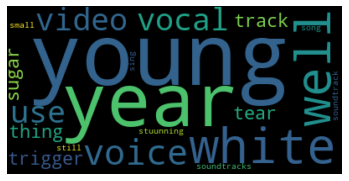

In [24]:
#Creating a dataframe with words and their frequency.

most_words = pd.DataFrame(count_vect.vocabulary_.items(), columns=['Word', 'Frequency'])[:100].sort_values(ascending=False, by = 'Frequency')[:20]
print(most_words)
mostwords_dict = most_words.set_index('Word').to_dict()

# To visualise the freqeuncy of words, we can use wordcloud that arranges the words by size. From the generated word cloud we can see the most frequently occurring words are 'Young', 'Year' and 'White'.

from wordcloud import WordCloud
wordcloud = WordCloud(stopwords=stopwords).generate_from_frequencies(mostwords_dict['Frequency'])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

### 3.Creating a Model
<br> A model is created to classify the data according to the assigned labels. 
<br> Multinomial Naive Bayes classification uses Bayes's Theorem to predict the category of a text with strong independence assumptions between the features.

In [25]:
from sklearn.naive_bayes import MultinomialNB
MB = MultinomialNB()

In [26]:
MB.fit(train_set, train_labels[:10000])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
MB.fit(test_set, test_labels[:1000])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### 4.Prediction and Evaluation

In [28]:
#Calculating the accuracy of the model used
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
predictions_valid = MB.predict(test_set)
print('Confusion Matrix: {}'.format(confusion_matrix(predictions_valid, test_labels[:1000])*100))
print('Classification Report: {}'.format(classification_report(predictions_valid, test_labels[:1000])))
print('Accuracy score = {}'.format(accuracy_score(predictions_valid, test_labels[:1000])*100))

Confusion Matrix: [[49300  1400]
 [  500 48800]]
Classification Report:               precision    recall  f1-score   support

          -1       0.99      0.97      0.98       507
           1       0.97      0.99      0.98       493

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

Accuracy score = 98.1
